1. 세계에서 사람들이 가장 많이 사용하는 언어를 1위부터 10위까지 표로 시각화하기
2. 대륙별로 기대 수명이 낮은 순서대로 시각화하기
3. 지역별 1인 당 평균 땅 면적 높은 순서대로 7곳 시각화하기
4. 인구가 많은 상위 5개 나라에서 사용하는 언어(언어 이름에 h 혹은 b 혹은 p가 들어가는 것으로 제한)별 사람 수를 시각화하기
5. 정부 형태 별에 따른 국가의 평균 GNP를 상위 6위까지 시각화하기

# 기본 세팅


In [ ]:
!pip install pymysql

     |████████████████████████████████| 43 kB 1.1 MB/s 


In [ ]:
HOST = "ec2-13-209-40-91.ap-northeast-2.compute.amazonaws.com"
PORT = 3306

In [ ]:
import pymysql

world_db = pymysql.connect(
    user="yeaeun",
    passwd="1111",
    host=HOST,
    port=PORT,
    db='world'
)

world_db

In [ ]:
cursor = world_db.cursor(pymysql.cursors.DictCursor)
cursor

# 예제 1
### 세계에서 사람들이 가장 많이 사용하는 언어를 1위부터 10위까지 표로 시각화하기


In [ ]:
sql = """SELECT countrylanguage.CountryCode, countrylanguage.Language, countrylanguage.Percentage, country.Population, countrylanguage.Percentage*country.Population as "cnt_pop"
         FROM countrylanguage
         JOIN country
         ON countrylanguage.CountryCode = country.Code
"""

cursor.execute(sql)

984

In [ ]:
import pandas as pd

result = cursor.fetchall()
test12 = pd.DataFrame(result)
test12.head()

,CountryCode,Language,Percentage,Population,cnt_pop
0,ABW,Dutch,5.3,103000,545900.0
1,ABW,English,9.5,103000,978500.0
2,ABW,Papiamento,76.7,103000,7900100.0
3,ABW,Spanish,7.4,103000,762200.0
4,AFG,Balochi,0.9,22720000,20448000.0


In [ ]:
test12_copy = test12.copy()
test_new = test12_copy.groupby("Language")[["cnt_pop"]].sum()
test_new = test_new.sort_values(by="cnt_pop", ascending=False)
test_new = test_new.head(10)
test_new = test_new.reset_index()
test_new

,Language,cnt_pop
0,Chinese,119184353900.0
1,Hindi,40563307000.0
2,Spanish,35502946200.0
3,English,34707786730.0
4,Arabic,23383923870.0
5,Bengali,20930471900.0
6,Portuguese,17759526940.0
7,Russian,16080756130.0
8,Japanese,12681410800.0
9,Punjabi,10402537100.0


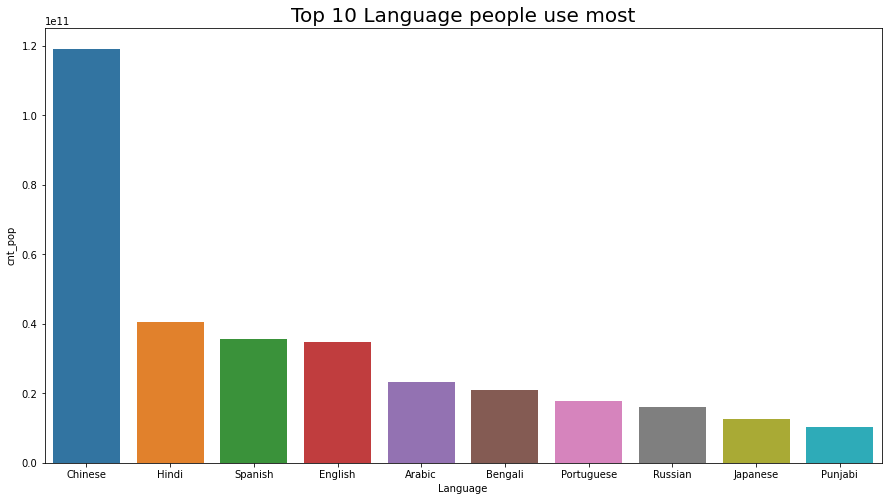

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x="Language", y="cnt_pop", data=test_new)
plt.title("Top 10 Language people use most", fontsize=20)
plt.show()

# 예제 2
### 대륙별로 기대 수명이 낮은 순서대로 시각화하기



In [ ]:
sql1 = "SELECT * FROM country"

cursor.execute(sql1)
result1 = cursor.fetchall()
test23 = pd.DataFrame(result1)
test23.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [ ]:
test23 = test23[["Name", "Continent", "LifeExpectancy"]]
test23.head()

,Name,Continent,LifeExpectancy
0,Aruba,North America,78.4
1,Afghanistan,Asia,45.9
2,Angola,Africa,38.3
3,Anguilla,North America,76.1
4,Albania,Europe,71.6


In [ ]:
test23_new = test23.groupby("Continent")[["LifeExpectancy"]].mean()
test23_new

,LifeExpectancy
Continent,
Africa,52.571930
Antarctica,NaN
Asia,67.441176
Europe,75.147727
North America,72.991892
Oceania,69.715000
South America,70.946154


In [ ]:
test23_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Africa to South America
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LifeExpectancy  6 non-null      float64
dtypes: float64(1)
memory usage: 412.0+ bytes


In [ ]:
test23_new = test23_new.dropna(axis=0, how="any")
test23_new

,LifeExpectancy
Continent,
Africa,52.571930
Asia,67.441176
Europe,75.147727
North America,72.991892
Oceania,69.715000
South America,70.946154


In [ ]:
test23_new = test23_new.sort_values(by="LifeExpectancy")
test23_new = test23_new.reset_index()
test23_new

,Continent,LifeExpectancy
0,Africa,52.571930
1,Asia,67.441176
2,Oceania,69.715000
3,South America,70.946154
4,North America,72.991892
5,Europe,75.147727


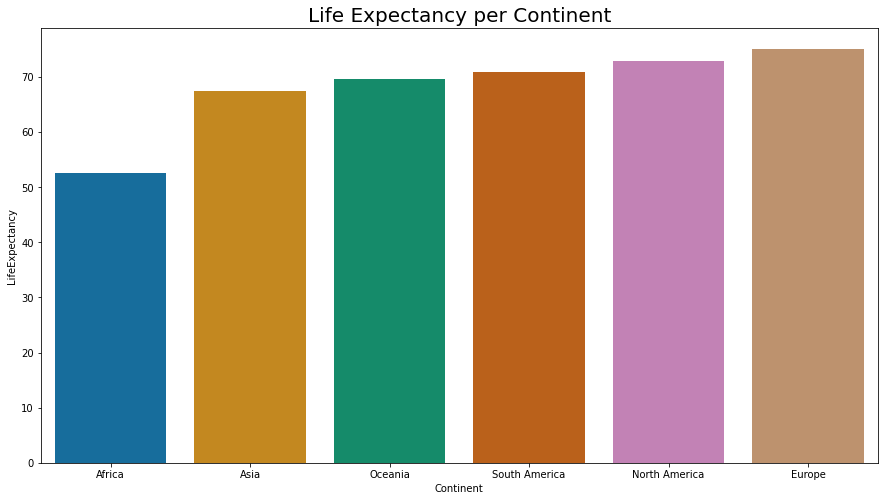

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Continent", y="LifeExpectancy",data=test23_new, palette="colorblind")
plt.title("Life Expectancy per Continent", fontsize=20)
plt.show()

# 예제 3
### 지역별 1인 당 평균 땅 면적 높은 순서대로 7곳 시각화하기


In [ ]:
sql2 = "SELECT * FROM country WHERE Population !=0 and SurfaceArea !=0"

cursor.execute(sql2)
result2 = cursor.fetchall()

test34 = pd.DataFrame(result2)
test34.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34,AL


In [ ]:
test34_new = test34[["Region", "SurfaceArea", "Population"]]
test34_new.head()

,Region,SurfaceArea,Population
0,Caribbean,193.00,103000
1,Southern and Central Asia,652090.00,22720000
2,Central Africa,1246700.00,12878000
3,Caribbean,96.00,8000
4,Southern Europe,28748.00,3401200


In [ ]:
test34_new = test34_new.astype({"SurfaceArea":"float"})

In [ ]:
test34_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       232 non-null    object 
 1   SurfaceArea  232 non-null    float64
 2   Population   232 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
test34_new = test34_new.groupby("Region")["SurfaceArea", "Population"].sum()
test34_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,SurfaceArea,Population
Region,,
Australia and New Zealand,8011939.0,22753100
Baltic Countries,175117.0,7561900
British Islands,313173.0,63398500
Caribbean,234423.0,38140000
Central Africa,6612667.0,95652000


In [ ]:
test34_new["Surface/Population"] = test34_new["SurfaceArea"]/test34_new["Population"]
test34_new.head()

,SurfaceArea,Population,Surface/Population
Region,,,
Australia and New Zealand,8011939.0,22753100,0.352125
Baltic Countries,175117.0,7561900,0.023158
British Islands,313173.0,63398500,0.004940
Caribbean,234423.0,38140000,0.006146
Central Africa,6612667.0,95652000,0.069133


In [ ]:
test34_new = test34_new.sort_values(by="Surface/Population", ascending=False)
test34_new = test34_new.head(7)
test34_new

,SurfaceArea,Population,Surface/Population
Region,,,
Australia and New Zealand,8011939.0,22753100,0.352125
Melanesia,540774.0,6472000,0.083556
North America,21500515.0,309632000,0.069439
Central Africa,6612667.0,95652000,0.069133
Eastern Europe,18814094.0,307026000,0.061279
Southern Africa,2674778.0,46886000,0.057049
Nordic Countries,1321901.0,24166400,0.054700


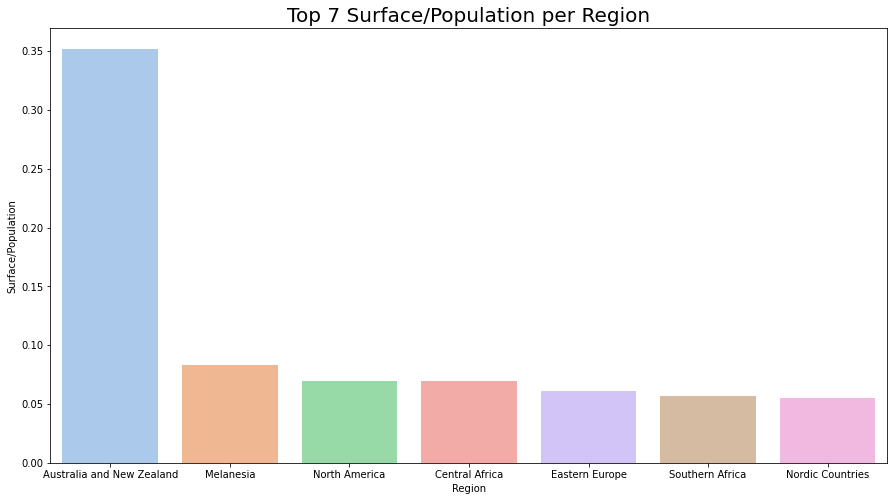

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x=test34_new.index, y="Surface/Population", data=test34_new, palette = "pastel")
plt.title("Top 7 Surface/Population per Region", fontsize=20)
plt.show()

# 예제 4
### 인구가 많은 상위 5개 나라에서 사용하는 언어(언어 이름에 h 혹은 b 혹은 p가 들어가는 것으로 제한)별 사람 수를 시각화하기


In [ ]:
sql3 = """SELECT countrylanguage.CountryCode, countrylanguage.Language, countrylanguage.Percentage, country.Population, countrylanguage.Percentage*country.Population as "cnt_pop"
         FROM countrylanguage
         JOIN country
         ON countrylanguage.CountryCode = country.Code
         WHERE countrylanguage.Language like "%h%" or countrylanguage.Language like "%b%" or countrylanguage.Language like "%p%"
         ORDER BY country.Population desc
"""

cursor.execute(sql3)
result3 = cursor.fetchall()

test45 = pd.DataFrame(result3)
test45.head()

,CountryCode,Language,Percentage,Population,cnt_pop
0,CHN,Zhuang,1.4,1277558000,1788581200.0
1,CHN,Chinese,92.0,1277558000,117535336000.0
2,CHN,Puyi,0.2,1277558000,255511600.0
3,CHN,Uighur,0.6,1277558000,766534800.0
4,CHN,Hui,0.8,1277558000,1022046400.0


In [ ]:
test45["CountryCode"].unique()[:5]

array(['CHN', 'IND', 'USA', 'IDN', 'BRA'], dtype=object)

In [ ]:
mask_countrycode = ['CHN', 'IND', 'USA', 'IDN', 'BRA']
gm = test45["CountryCode"].isin(mask_countrycode)

In [ ]:
col = ["CountryCode", "Language", "Percentage", "Population", "cnt_pop"]

test45_new = test45.loc[gm, col]
test45_new

,CountryCode,Language,Percentage,Population,cnt_pop
0,CHN,Zhuang,1.4,1277558000,1788581200.0
1,CHN,Chinese,92.0,1277558000,117535336000.0
2,CHN,Puyi,0.2,1277558000,255511600.0
3,CHN,Uighur,0.6,1277558000,766534800.0
4,CHN,Hui,0.8,1277558000,1022046400.0
5,CHN,Tibetan,0.4,1277558000,511023200.0
6,IND,Punjabi,2.8,1013662000,2838253600.0
7,IND,Bengali,8.2,1013662000,8312028400.0
8,IND,Marathi,7.4,1013662000,7501098800.0
9,IND,Hindi,39.9,1013662000,40445113800.0


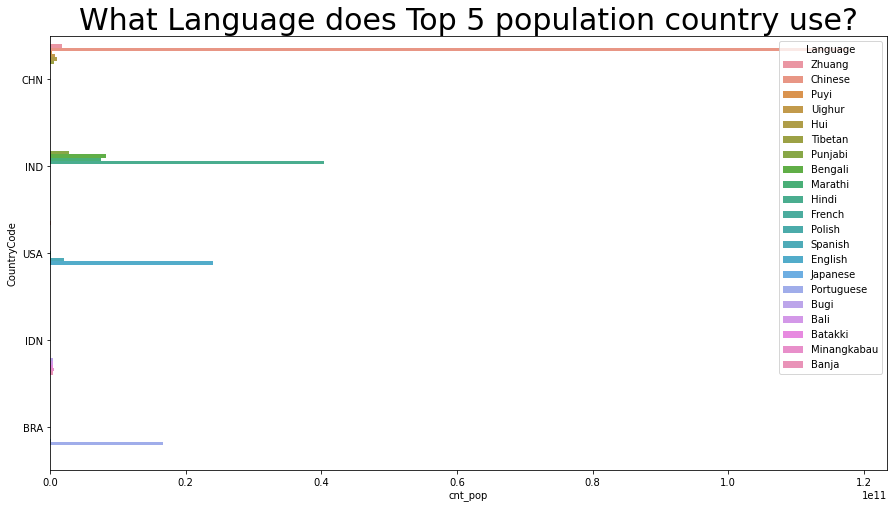

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(y="CountryCode", x="cnt_pop", hue="Language", data=test45_new)
plt.title("What Language does Top 5 population country use?", fontsize=30)
plt.show()

# 예제 5
### 정부 형태 별에 따른 국가의 평균 GNP를 상위 6위까지 시각화하기


In [ ]:
sql4 = "SELECT GovernmentForm, GNP FROM country"

cursor.execute(sql4)
result4 = cursor.fetchall()

test56 = pd.DataFrame(result4)
test56.head()

,GovernmentForm,GNP
0,Nonmetropolitan Territory of The Netherlands,828.00
1,Islamic Emirate,5976.00
2,Republic,6648.00
3,Dependent Territory of the UK,63.20
4,Republic,3205.00


In [ ]:
test56_new = test56.groupby("GovernmentForm")[["GNP"]].mean()
test56_new = test56_new.sort_values(by="GNP", ascending=False)
test56_new = test56_new.head(6)
test56_new

,GNP
GovernmentForm,
People'sRepublic,982268.000000
Federal Republic,886683.866667
"Constitutional Monarchy, Federation",317240.250000
Federation,264478.000000
Constitutional Monarchy,237960.896552
Islamic Republic,102954.000000


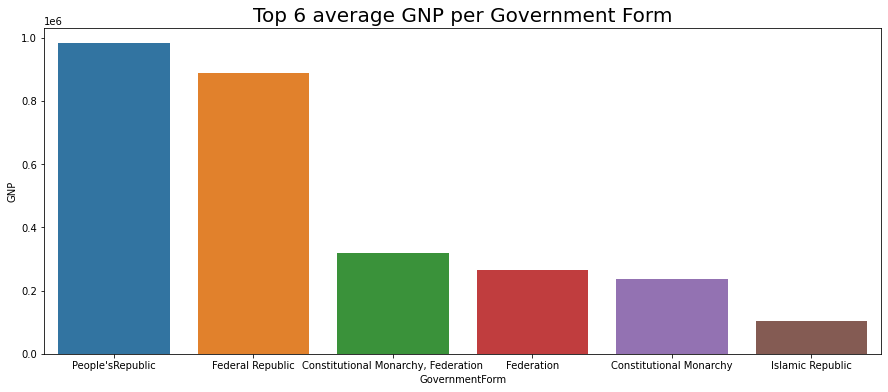

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=test56_new.index, y="GNP", data=test56_new)
plt.title("Top 6 average GNP per Government Form", fontsize=20)
plt.show()